In [1]:
import pandas as pd
import numpy as np
data = pd.read_parquet('Uberdata.parquet')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 265, 6, Finished, Available, Finished)

In [2]:
data.head()

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 7, Finished, Available, Finished)

,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,...,sales_tax,congestion_surcharge,driver_pay,date,month,day,estimated_emissions,average_speed,estimated_levels,speed_category
0,B02764,B02764,07:06:55,07:11:30,07:12:31,07:20:02,169,244,1.241269,6.113682,...,0.451076,0.00,2.061787,01-01-2020,1,1,501.472510,12.181876,Medium,Congested
1,B02764,B02764,07:20:11,07:21:54,07:23:19,07:34:31,244,74,1.449269,6.511745,...,0.774727,0.00,2.489894,01-01-2020,1,1,585.504741,13.353739,Medium,Congested
2,B02764,B02764,07:34:12,07:36:42,07:38:21,07:41:18,74,74,0.587787,5.634790,...,0.494696,0.00,1.922788,01-01-2020,1,1,237.465813,6.258832,Low,Congested
3,B02887,B02887,07:22:43,07:23:00,07:23:51,07:42:20,48,112,1.747459,7.012115,...,1.166271,0.75,2.719979,01-01-2020,1,1,705.973521,14.952343,High,Congested
4,B02887,B02887,07:28:19,07:32:37,07:34:01,08:05:13,233,61,2.305581,7.535297,...,1.036737,0.75,3.025776,01-01-2020,1,1,931.454563,18.358247,High,Moderate


In [3]:
data.columns

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 8, Finished, Available, Finished)

Index(['dispatching_base_num', 'originating_base_num', 'request_datetime',
       'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime',
       'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'bcf', 'sales_tax', 'congestion_surcharge',
       'driver_pay', 'date', 'month', 'day', 'estimated_emissions',
       'average_speed', 'estimated_levels', 'speed_category'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np

# Step 1: Data Overview
print("Data Overview:")
print(data.info())  # Check data types and null values
print("\nMissing Values:")
print(data.isnull().sum())  # Count missing values in each column
print("\nStatistical Summary:")
print(data.describe())  # Summary for numerical columns

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 9, Finished, Available, Finished)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51380738 entries, 0 to 51380737
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  average_speed         float64
 20  estimated_levels      object 
 21  speed_category        object 
dtypes: float64(9), int64(4), 

In [6]:
import pandas as pd
# Step 2: Automatically infer datetime format for `date`
try:
    data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
except ValueError:
    # Handle multiple formats explicitly if needed
    date_formats = ['%d-%m-%Y', '%m-%d-%Y']  # Common formats to check
    for fmt in date_formats:
        try:
            data['date'] = pd.to_datetime(data['date'], format=fmt)
            break  # Exit the loop if successful
        except ValueError:
            continue
    else:
        raise ValueError("None of the specified formats match the date format.")

# Step 3: Parse time columns by combining with `date`
time_columns = ['request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']
for col in time_columns:
    # Ensure time columns are strings before concatenation
    data[col] = pd.to_datetime(data['date'].astype(str) + ' ' + data[col].astype(str), format='%Y-%m-%d %H:%M:%S')

# Step 4: Extract temporal features
data['hour_of_day'] = data['pickup_datetime'].dt.hour  # Extract hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)  # Flag for weekend trips

# Step 5: Display a sample of the data
print(data[['pickup_datetime', 'hour_of_day', 'day_of_week', 'is_weekend']].head())


StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 11, Finished, Available, Finished)

      pickup_datetime  hour_of_day  day_of_week  is_weekend
0 2020-01-01 07:12:31            7            2           0
1 2020-01-01 07:23:19            7            2           0
2 2020-01-01 07:38:21            7            2           0
3 2020-01-01 07:23:51            7            2           0
4 2020-01-01 07:34:01            7            2           0


StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 12, Submitted, Running, Running)

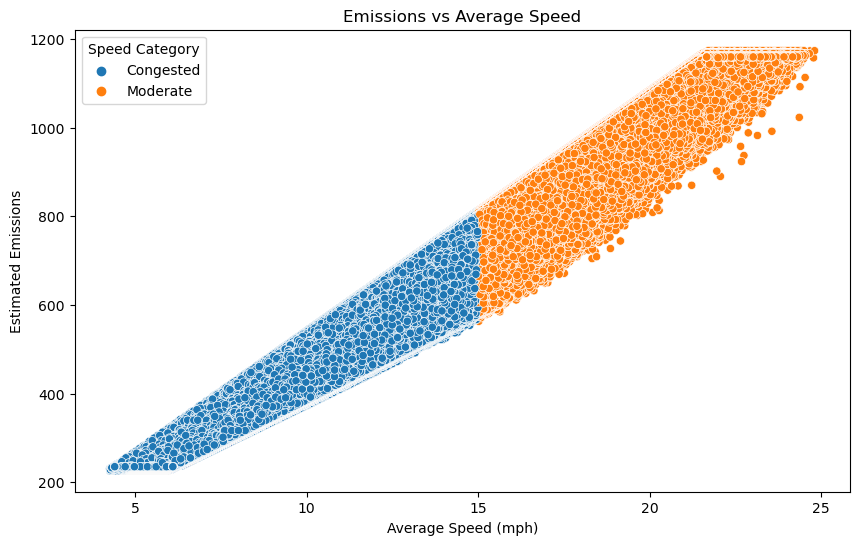

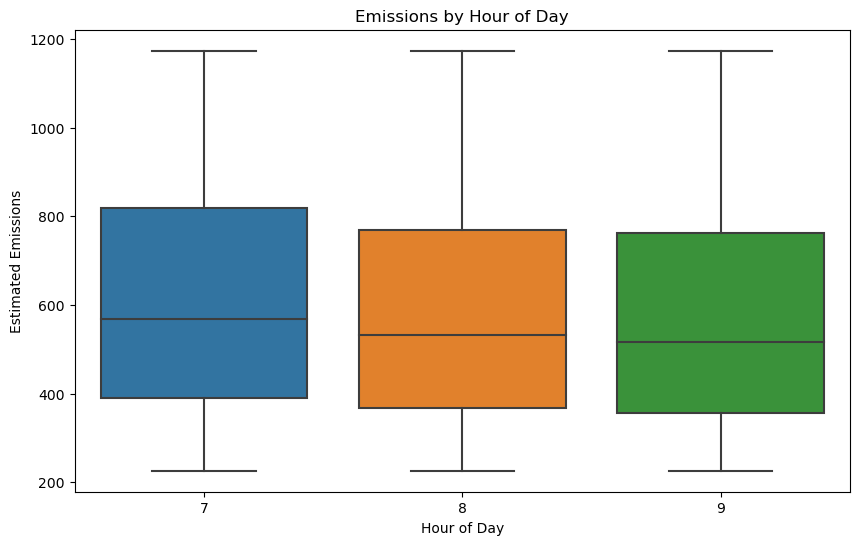

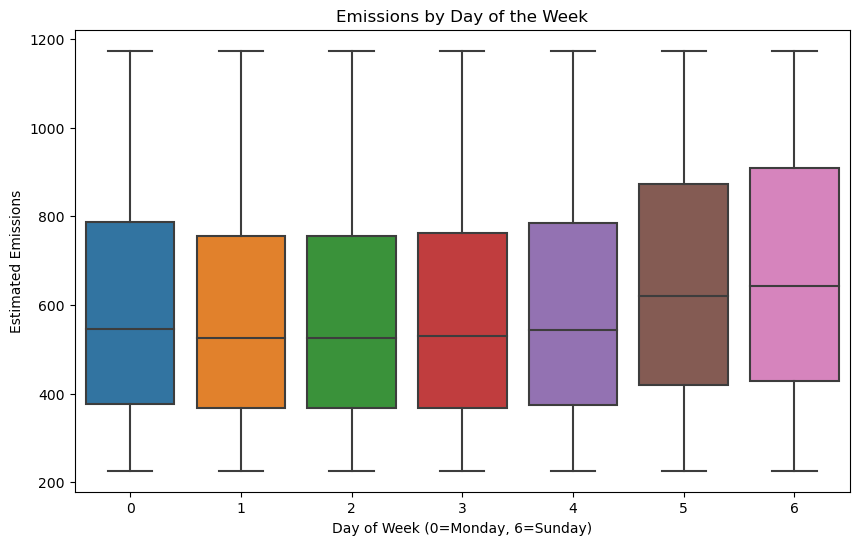

       emissions_per_mile  emissions_per_minute
count        5.138074e+07          5.138074e+07
mean         4.040000e+02          1.427590e+00
std          2.081610e-14          5.317212e-01
min          4.040000e+02          4.780230e-01
25%          4.040000e+02          9.894426e-01
50%          4.040000e+02          1.338255e+00
75%          4.040000e+02          1.825579e+00
max          4.040000e+02          2.784787e+00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data with valid values for key columns
data = data[(data['trip_time'] > 0) & (data['trip_miles'] > 0)]  # Remove invalid rows

# Step 2: Feature Engineering
data['emissions_per_mile'] = data['estimated_emissions'] / data['trip_miles']
data['emissions_per_minute'] = data['estimated_emissions'] / (data['trip_time'] * 60)  # Convert seconds to minutes

# Step 3: Analyze Emissions Trends
# 3a: Relationship with average speed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='average_speed', y='estimated_emissions', hue='speed_category')
plt.title('Emissions vs Average Speed')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Estimated Emissions')
plt.legend(title='Speed Category')
plt.show()

# 3b: Emissions by Hour of Day
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='hour_of_day', y='estimated_emissions')
plt.title('Emissions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Emissions')
plt.show()

# 3c: Emissions by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='day_of_week', y='estimated_emissions')
plt.title('Emissions by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Estimated Emissions')
plt.show()

# Step 4: Display engineered columns
print(data[['emissions_per_mile', 'emissions_per_minute']].describe())


Emissions vs. Average Speed:

Congested traffic leads to lower average speeds but still significant emissions.
Moderate traffic corresponds to higher average speeds and potentially more emissions per mile.
Emissions by Hour of Day:

There is variability in emissions during rush hours (7-9 AM).
Median emissions seem similar, but there might be interesting patterns in the spread.
Emissions by Day of the Week:

Weekend emissions (Saturday and Sunday) seem more variable.
Weekday emissions show a relatively consistent median.

In [9]:
pip install geopandas

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 14, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 91.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 122.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 132.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 15, Finished, Available, Finished)

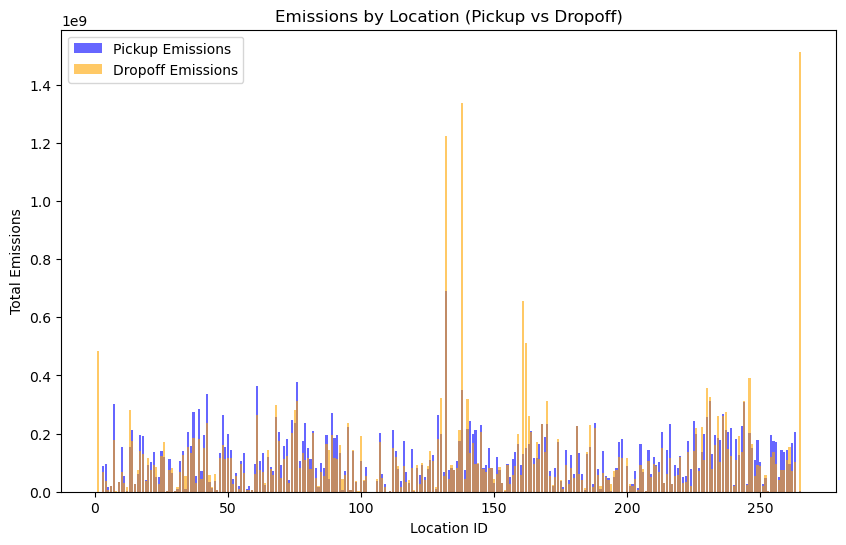

Top 10 Pickup Locations by Emissions:
     PULocationID  total_emissions_pickup
129           132            6.897851e+08
75             76            3.775231e+08
60             61            3.638484e+08
135           138            3.504462e+08
41             42            3.365037e+08
228           231            3.126777e+08
241           244            3.094640e+08
6               7            3.030093e+08
38             39            2.854577e+08
36             37            2.730739e+08

Top 10 Dropoff Locations by Emissions:
     DOLocationID  total_emissions_dropoff
262           265             1.513613e+09
136           138             1.336142e+09
130           132             1.223843e+09
159           161             6.546828e+08
160           162             5.117440e+08
0               1             4.825904e+08
244           246             3.915853e+08
228           230             3.570584e+08
229           231             3.251680e+08
128           130             

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Aggregate emissions by pickup and dropoff locations
pickup_emissions = data.groupby('PULocationID')['estimated_emissions'].sum().reset_index()
dropoff_emissions = data.groupby('DOLocationID')['estimated_emissions'].sum().reset_index()

# Rename columns for clarity
pickup_emissions.rename(columns={'estimated_emissions': 'total_emissions_pickup'}, inplace=True)
dropoff_emissions.rename(columns={'estimated_emissions': 'total_emissions_dropoff'}, inplace=True)

# Step 2: Merge pickup and dropoff emissions
emissions_summary = pickup_emissions.merge(dropoff_emissions, left_on='PULocationID', right_on='DOLocationID', how='outer')

# Step 3: Visualize emissions by pickup and dropoff locations
plt.figure(figsize=(10, 6))
plt.bar(pickup_emissions['PULocationID'], pickup_emissions['total_emissions_pickup'], color='blue', alpha=0.6, label='Pickup Emissions')
plt.bar(dropoff_emissions['DOLocationID'], dropoff_emissions['total_emissions_dropoff'], color='orange', alpha=0.6, label='Dropoff Emissions')
plt.title('Emissions by Location (Pickup vs Dropoff)')
plt.xlabel('Location ID')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()

# Step 4: Identify hotspots (top 10 locations by emissions)
top_pickup_locations = pickup_emissions.nlargest(10, 'total_emissions_pickup')
top_dropoff_locations = dropoff_emissions.nlargest(10, 'total_emissions_dropoff')

print("Top 10 Pickup Locations by Emissions:")
print(top_pickup_locations)

print("\nTop 10 Dropoff Locations by Emissions:")
print(top_dropoff_locations)


In [11]:
# Step 1: Load the taxi zone lookup file
lookup = pd.read_csv('Users/aamahesh/taxi_zone_lookup (1).csv')

# Step 2: Merge lookup data with emissions data for pickup and dropoff locations
# For pickup locations
pickup_with_zones = pickup_emissions.merge(lookup, left_on='PULocationID', right_on='LocationID', how='left')
pickup_with_zones = pickup_with_zones[['PULocationID', 'total_emissions_pickup', 'Borough', 'Zone']]

# For dropoff locations
dropoff_with_zones = dropoff_emissions.merge(lookup, left_on='DOLocationID', right_on='LocationID', how='left')
dropoff_with_zones = dropoff_with_zones[['DOLocationID', 'total_emissions_dropoff', 'Borough', 'Zone']]

# Step 3: Sort and display the top 10 zones for both pickup and dropoff emissions
top_pickup_zones = pickup_with_zones.nlargest(10, 'total_emissions_pickup')
top_dropoff_zones = dropoff_with_zones.nlargest(10, 'total_emissions_dropoff')

print("Top 10 Pickup Zones by Emissions:")
print(top_pickup_zones)

print("\nTop 10 Dropoff Zones by Emissions:")
print(top_dropoff_zones)


StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 16, Finished, Available, Finished)

Top 10 Pickup Zones by Emissions:
     PULocationID  total_emissions_pickup    Borough                      Zone
129           132            6.897851e+08     Queens               JFK Airport
75             76            3.775231e+08   Brooklyn             East New York
60             61            3.638484e+08   Brooklyn       Crown Heights North
135           138            3.504462e+08     Queens         LaGuardia Airport
41             42            3.365037e+08  Manhattan      Central Harlem North
228           231            3.126777e+08  Manhattan      TriBeCa/Civic Center
241           244            3.094640e+08  Manhattan  Washington Heights South
6               7            3.030093e+08     Queens                   Astoria
38             39            2.854577e+08   Brooklyn                  Canarsie
36             37            2.730739e+08   Brooklyn            Bushwick South

Top 10 Dropoff Zones by Emissions:
     DOLocationID  total_emissions_dropoff    Borough  \
262 

Analysis of Results
Top Pickup Zones
Airports dominate: JFK Airport (Queens) and LaGuardia Airport (Queens) are the top contributors to pickup emissions.
Brooklyn hot zones: Areas like East New York, Crown Heights North, and Canarsie are major contributors.
Manhattan activity: Pickup emissions are high in neighborhoods like Central Harlem North, TriBeCa/Civic Center, and Washington Heights South.
Top Dropoff Zones
JFK and LaGuardia Airports again dominate, as expected due to dropoffs at major travel hubs.
Non-NYC location (Outside of NYC): A significant number of trips are dropping passengers outside the city, possibly to suburban areas or other cities.
Midtown Manhattan: Midtown Center, Midtown East, and Times Sq/Theatre District are among the top dropoff zones due to business, tourism, and traffic congestion.
Newark Airport (EWR): Dropoffs at Newark Airport also contribute substantially to emissions.


StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 24, 17, Finished, Available, Finished)

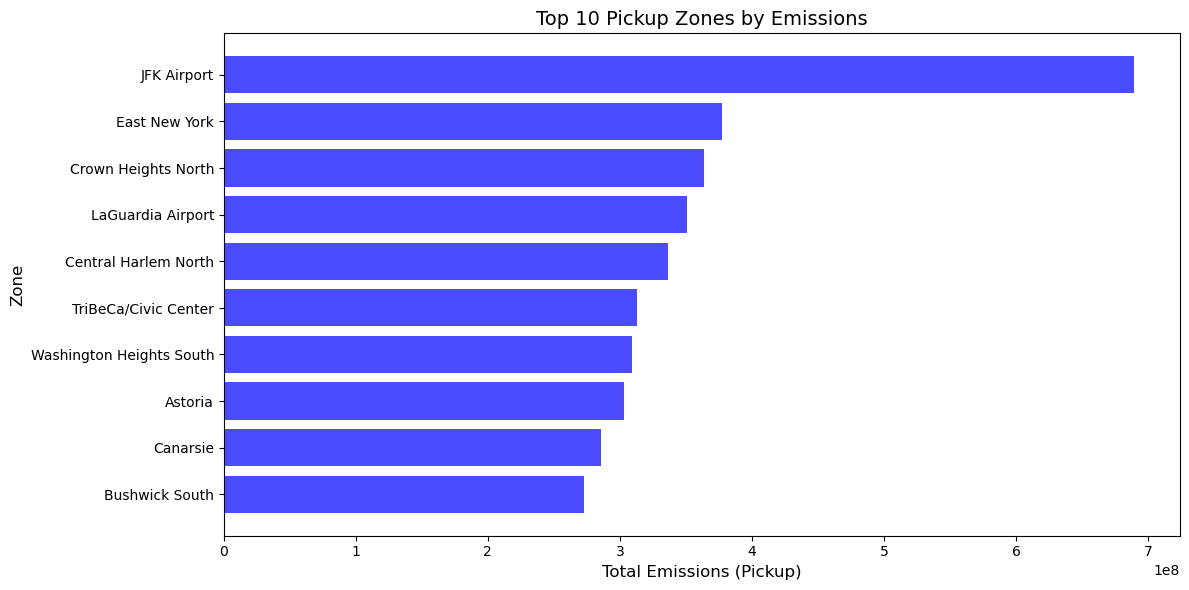

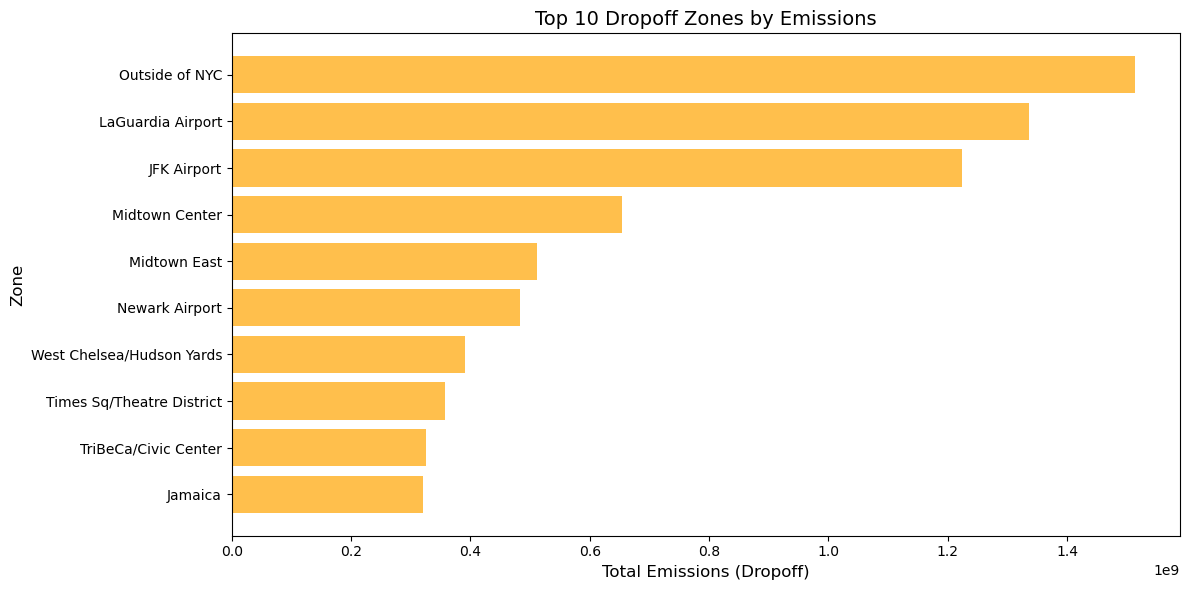

In [12]:
import matplotlib.pyplot as plt

# Step 1: Bar chart for top pickup zones
plt.figure(figsize=(12, 6))
plt.barh(top_pickup_zones['Zone'], top_pickup_zones['total_emissions_pickup'], color='blue', alpha=0.7)
plt.title('Top 10 Pickup Zones by Emissions', fontsize=14)
plt.xlabel('Total Emissions (Pickup)', fontsize=12)
plt.ylabel('Zone', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

# Step 2: Bar chart for top dropoff zones
plt.figure(figsize=(12, 6))
plt.barh(top_dropoff_zones['Zone'], top_dropoff_zones['total_emissions_dropoff'], color='orange', alpha=0.7)
plt.title('Top 10 Dropoff Zones by Emissions', fontsize=14)
plt.xlabel('Total Emissions (Dropoff)', fontsize=12)
plt.ylabel('Zone', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()
